In [5]:
import pandas as pd

# CSV 파일 읽기
file_path = '서울시 단란주점영업 인허가 정보.csv'
data = pd.read_csv(file_path, encoding='cp949')  # 또는 encoding='euc-kr'

# 영업상태코드가 1인 행만 남기기
filtered_data = data[data['영업상태코드'] == 1]

# 새로운 CSV 파일로 저장
filtered_data.to_csv('정제된 서울시 단란주점영업 인허가 정보.csv', index=False)

In [4]:
import pandas as pd

# CSV 파일 읽기
file_path = '서울시 유흥주점영업 인허가 정보.csv'
data = pd.read_csv(file_path, encoding='cp949')  # 또는 encoding='euc-kr'

# 영업상태코드가 1인 행만 남기기
filtered_data = data[data['영업상태코드'] == 1]

# 새로운 CSV 파일로 저장
filtered_data.to_csv('정제된 서울시 유흥주점영업 인허가 정보.csv', index=False)

In [17]:
import pandas as pd

# 파일 경로
file_path_yu = '정제된 서울시 유흥주점영업 인허가 정보.csv'
file_path_danran = '정제된 서울시 단란주점영업 인허가 정보.csv'

# 파일 읽기
yu_data = pd.read_csv(file_path_yu, encoding='utf-8')  # 또는 'cp949', 'euc-kr' 등 사용 가능
danran_data = pd.read_csv(file_path_danran, encoding='utf-8')  # 또는 'cp949', 'euc-kr' 등 사용 가능

# 두 데이터프레임을 합치기
merged_data = pd.concat([yu_data, danran_data])

# 결과를 CSV 파일로 저장
merged_data.to_csv('합쳐진_서울시_유흥단란_인허가_정보.csv', index=False)

In [21]:
import pandas as pd

# 파일 경로
file_path_yu = '합쳐진_서울시_유흥단란_인허가_정보.csv'

# 파일 읽기
merged_data = pd.read_csv(file_path_yu, encoding='utf-8')  # 또는 'cp949', 'euc-kr' 등 사용 가능

# '서울특별시' 다음에 오는 '구' 추출하여 '지역구' 컬럼 생성
merged_data['지역구'] = merged_data['주소'].apply(lambda x: x.split('서울특별시 ')[1].split(' ')[0] if pd.notna(x) and '서울특별시' in x else None)

# 결과를 CSV 파일로 저장
merged_data.to_csv('서울유흥주점현황.csv', index=False)

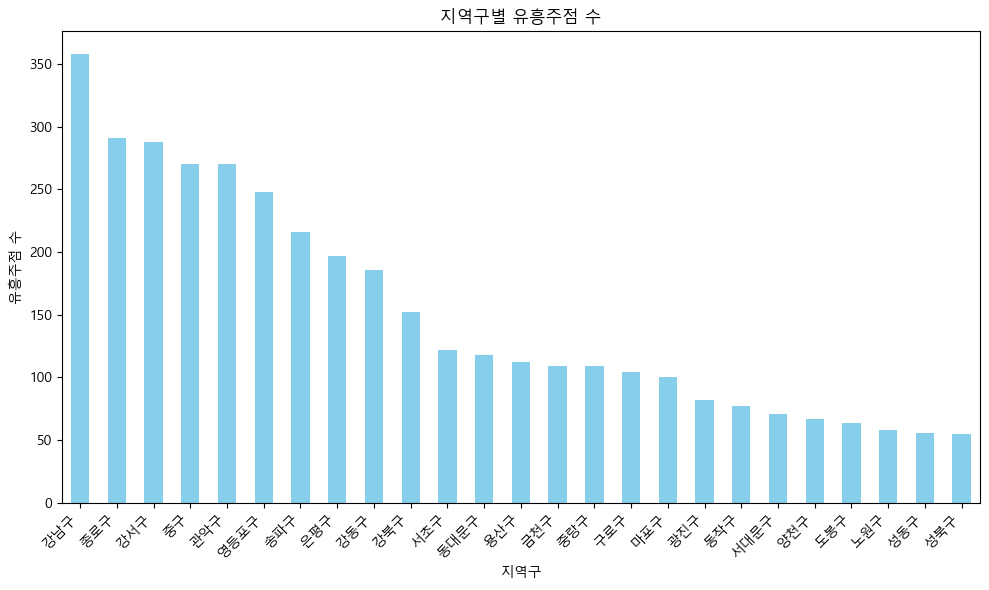

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 사용하고 있는 운영체제에 맞는 한글 폰트 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 읽기
file_path = '서울유흥주점현황.csv'
data = pd.read_csv(file_path, encoding='utf-8')  # 또는 'cp949', 'euc-kr' 등 사용 가능

# 지역구별 주점 수 계산
region_counts = data['지역구'].value_counts()

# 내림차순 정렬
region_counts = region_counts.sort_values(ascending=False)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('지역구별 유흥주점 수')
plt.xlabel('지역구')
plt.ylabel('유흥주점 수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

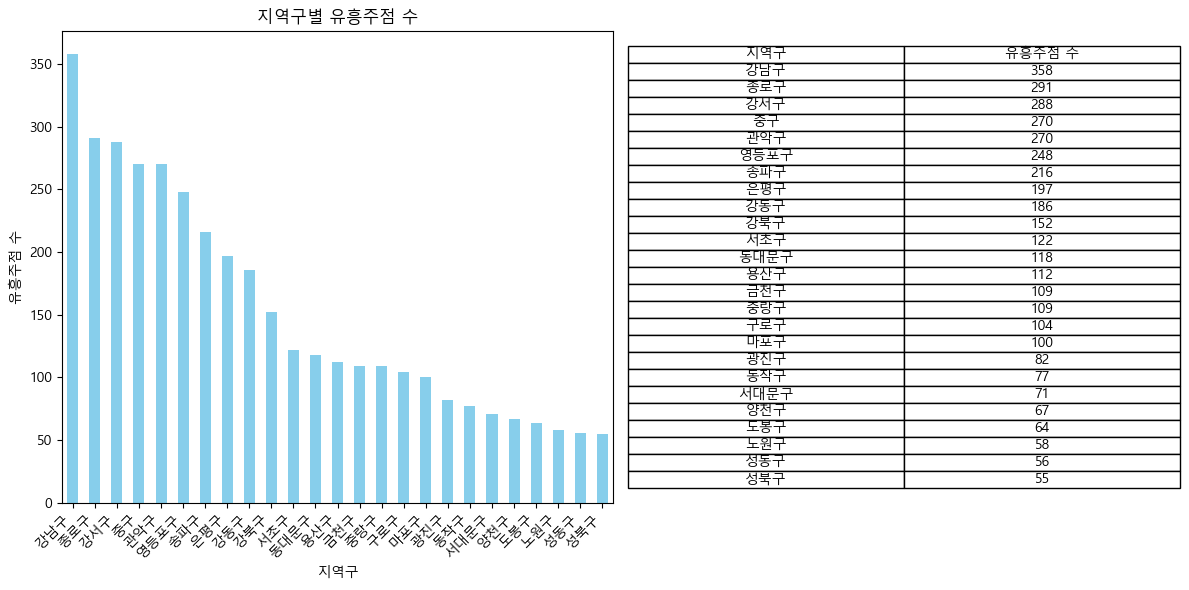

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 사용하고 있는 운영체제에 맞는 한글 폰트 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 읽기
file_path = '서울유흥주점현황.csv'
data = pd.read_csv(file_path, encoding='utf-8')  # 또는 'cp949', 'euc-kr' 등 사용 가능

# 지역구별 주점 수 계산
region_counts = data['지역구'].value_counts()

# 내림차순 정렬
region_counts = region_counts.sort_values(ascending=False)

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))

# Subplot for Bar Chart
plt.subplot(121)
region_counts.plot(kind='bar', color='skyblue')
plt.title('지역구별 유흥주점 수')
plt.xlabel('지역구')
plt.ylabel('유흥주점 수')
plt.xticks(rotation=45, ha='right')

# Subplot for Table
plt.subplot(122)
df_table = pd.DataFrame(region_counts).reset_index()
df_table.columns = ['지역구', '유흥주점 수']
plt.axis('off')  # Hide axes
plt.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc='center', loc='center')

plt.tight_layout()
plt.show()

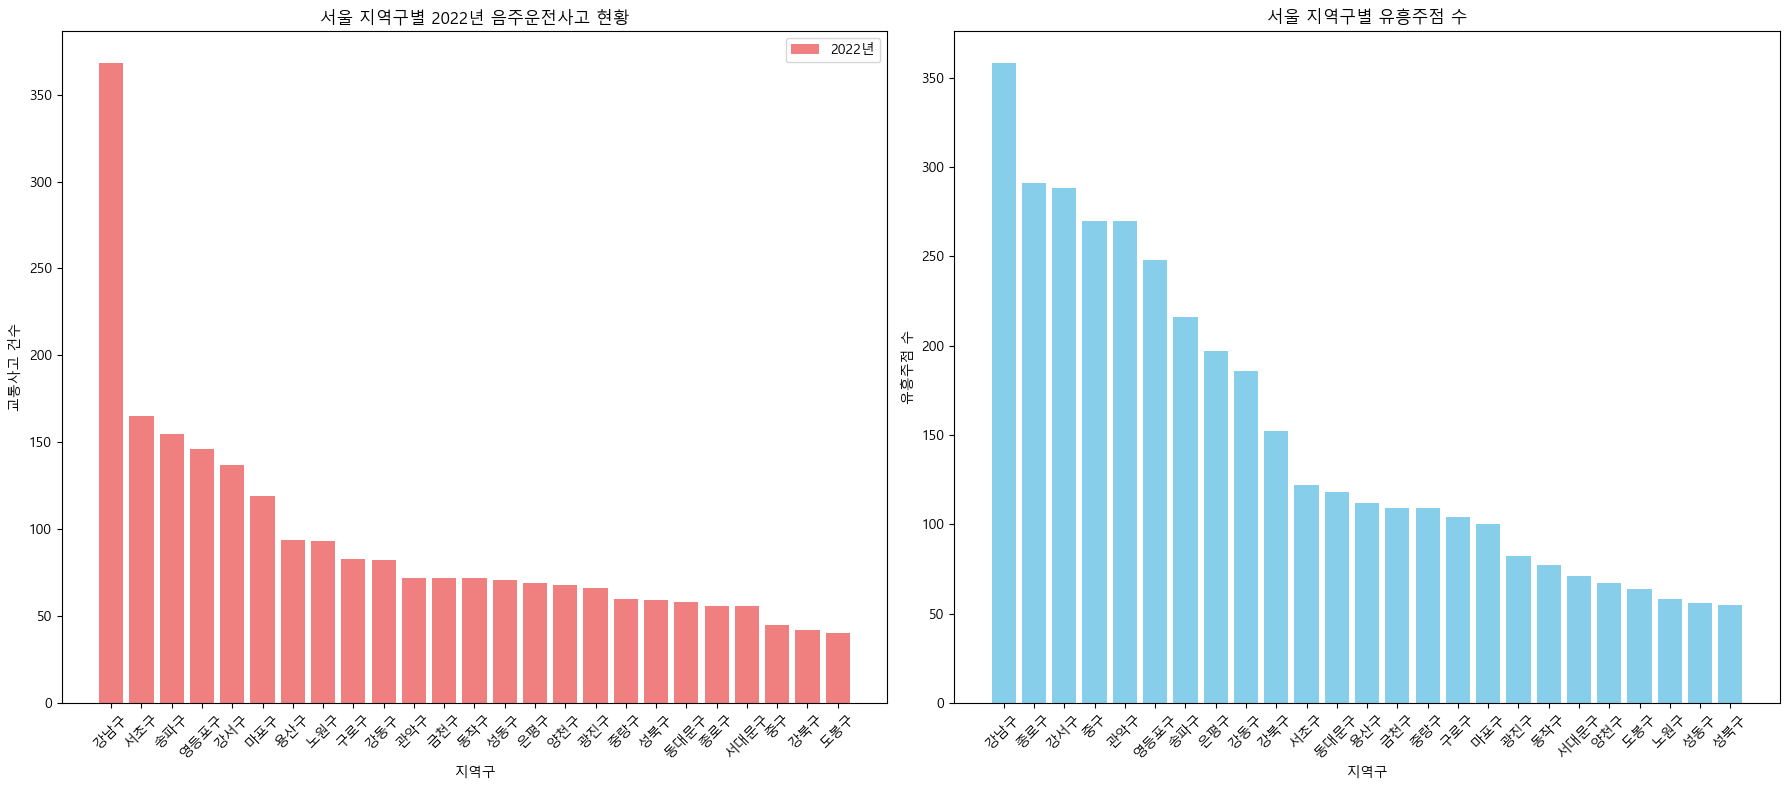

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 로드
file_path_accident = '서울 21,22 음주운전사고현황.csv'
file_path_club = '서울유흥주점현황.csv'

df_accident = pd.read_csv(file_path_accident, encoding='cp949')
df_club = pd.read_csv(file_path_club, encoding='utf-8')  # 또는 'cp949', 'euc-kr' 등 사용 가능

# 지역구별 교통사고 건수를 내림차순으로 정렬
df_accident_sorted = df_accident.sort_values(by='2022년', ascending=False)

# 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# 음주운전사고 그래프
axes[0].bar(df_accident_sorted['지역구'], df_accident_sorted['2022년'], color='lightcoral', label='2022년')
axes[0].set_title('서울 지역구별 2022년 음주운전사고 현황')
axes[0].set_xlabel('지역구')
axes[0].set_ylabel('교통사고 건수')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# 유흥주점 현황 그래프
region_counts = df_club['지역구'].value_counts().sort_values(ascending=False)
axes[1].bar(region_counts.index, region_counts.values, color='skyblue')
axes[1].set_title('서울 지역구별 유흥주점 수')
axes[1].set_xlabel('지역구')
axes[1].set_ylabel('유흥주점 수')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()